# Importing Necessaary Libraries and dataset

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
true = pd.read_csv('/content/drive/My Drive/Datasets/fake news data kaggle/True.csv')
fake = pd.read_csv('/content/drive/My Drive/Datasets/fake news data kaggle/Fake.csv')

# Exploring

In [82]:
print(true.info())
print('='*50)
print(fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [83]:
true['target'] = 1
fake['target'] = 0
df = pd.concat([true,fake], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [84]:
df['text'] = df.text.apply(lambda x: x.lower())
display(df)

title  ... target
0      As U.S. budget fight looms, Republicans flip their fiscal script                       ...  1    
1      U.S. military to accept transgender recruits on Monday: Pentagon                       ...  1    
2      Senior U.S. Republican senator: 'Let Mr. Mueller do his job'                           ...  1    
3      FBI Russia probe helped by Australian diplomat tip-off: NYT                            ...  1    
4      Trump wants Postal Service to charge 'much more' for Amazon shipments                  ...  1    
...                                                                      ...                  ... ..    
44893  McPain: John McCain Furious That Iran Treated US Sailors Well                          ...  0    
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-action: $4M for Lawyers, $0 for Users      ...  0    
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to Take Territorial Booty in Northern Syria  ...  0    
44896  How to Blow $700 Million: Al Jazeera America Finally Calls it Quits                    ...  0    
44897  10 U.S. Navy Sailors Held by Iranian Military – Signs of a Neocon Political Stunt      ...  0    

[44898 rows x 5 columns]

In [85]:
display(df.text[0])

'washington (reuters) - the head of a conservative republican faction in the u.s. congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on sunday and urged budget restraint in 2018. in keeping with a sharp pivot under way among republicans, u.s. representative mark meadows, speaking on cbs’ “face the nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in january. when they return from the holidays on wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the november congressional election campaigns approach in which republicans will seek to keep control of congress. president donald trump and his republicans want a big budget increase in military spending, while democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

## Example

In [ ]:
x = ['Hi this is Gaurav','Gaurav and Gaurav is cool']
v = CountVectorizer()
v.fit(x)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
arr = v.transform(x)
arr

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
v.vocabulary_

{'and': 0, 'cool': 1, 'gaurav': 2, 'hi': 3, 'is': 4, 'this': 5}

In [ ]:
v.get_feature_names()

['and', 'cool', 'gaurav', 'hi', 'is', 'this']

In [ ]:
arr.todense()

matrix([[0, 0, 1, 1, 1, 1],
        [1, 1, 2, 0, 1, 0]])

### Using TFidfvectorizer

In [ ]:
tfv = TfidfVectorizer()
tfv.fit(x)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
tfarr = tfv.transform(x)
tfarr

<2x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
tfv.vocabulary_

{'and': 0, 'cool': 1, 'gaurav': 2, 'hi': 3, 'is': 4, 'this': 5}

In [ ]:
tfarr.todense()

matrix([[0.        , 0.        , 0.40993715, 0.57615236, 0.40993715,
         0.57615236],
        [0.46977774, 0.46977774, 0.66850146, 0.        , 0.33425073,
         0.        ]])

# Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.target, test_size=.25, random_state=123, stratify=df.target)

In [ ]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(33673,)


(11225,)


(33673,)


(11225,)




In [ ]:
print('y_train distribution:')
print(y_train.value_counts())
print('y_test distribution:')
print(y_test.value_counts())

y_train distribution:
0    17610
1    16063
Name: target, dtype: int64
y_test distribution:
0    5871
1    5354
Name: target, dtype: int64


## Using Logistic Regression

In [ ]:
lr_pipeline_cv = Pipeline([('vect',CountVectorizer(stop_words='english')),
                     ('model',LogisticRegression())])
lr_pipeline_cv.fit(X_train, y_train)
lr_cv_pred = lr_pipeline_cv.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy: 99.63%


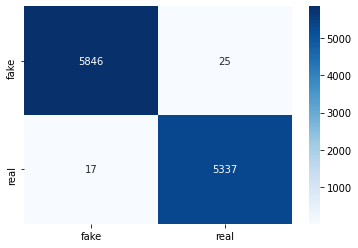

In [ ]:
print('accuracy: {:.2f}%'.format(accuracy_score(y_test,lr_cv_pred)*100))
cm = confusion_matrix(y_test,lr_cv_pred)
sns.heatmap(cm, cmap = 'Blues', annot= True, fmt = 'd', xticklabels = ['fake','real'], yticklabels = ['fake','real'])
plt.show()

In [ ]:
print(classification_report(y_test,lr_cv_pred, target_names=['fake','real']))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      5871
        real       1.00      1.00      1.00      5354

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [ ]:
scores = cross_val_score(lr_pipeline_cv, X= df.text, y= df.target, cv=5) 
print(scores)
print(scores.mean()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.99565702 0.99075724 0.98964365 0.99409734 0.99131306]
99.22936617016047


In [ ]:
lr_pipeline_tf = Pipeline([('vect',TfidfVectorizer(stop_words='english')),
                     ('model',LogisticRegression())])
lr_pipeline_tf.fit(X_train, y_train)
lr_tf_pred = lr_pipeline_tf.predict(X_test)

accuracy: 98.65%


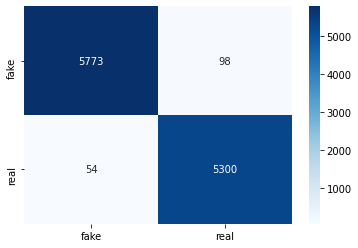

In [ ]:
print('accuracy: {:.2f}%'.format(accuracy_score(y_test,lr_tf_pred)*100))
cm = confusion_matrix(y_test,lr_tf_pred)
sns.heatmap(cm, cmap = 'Blues', annot= True, fmt = 'd', xticklabels = ['fake','real'], yticklabels = ['fake','real'])
plt.show()

In [ ]:
 print(classification_report(y_test,lr_tf_pred, target_names=['fake','real']))

              precision    recall  f1-score   support

        fake       0.99      0.98      0.99      5871
        real       0.98      0.99      0.99      5354

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
scores = cross_val_score(lr_pipeline_tf, X= df.text, y= df.target, cv=5) 
print(scores)
print(scores.mean()*100)

[0.98095768 0.97806236 0.9623608  0.97015258 0.97973048]
97.42527813599216


## Using Naive Bayes

In [ ]:
nb_pipeline_cv = Pipeline([('vect',CountVectorizer(stop_words='english')),
                     ('model',MultinomialNB())])
nb_pipeline_cv.fit(X_train, y_train)
nb_cv_pred = nb_pipeline_cv.predict(X_test)

accuracy: 95.33%


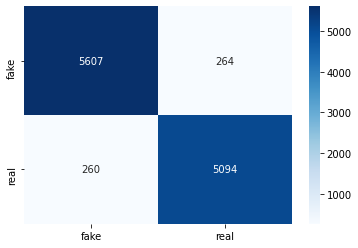

In [ ]:
print('accuracy: {:.2f}%'.format(accuracy_score(y_test,nb_cv_pred)*100))
cm = confusion_matrix(y_test,nb_cv_pred)
sns.heatmap(cm, cmap = 'Blues', annot= True, fmt = 'd', xticklabels = ['fake','real'], yticklabels = ['fake','real'])
plt.show()

In [ ]:
print(classification_report(y_test,nb_cv_pred, target_names=['fake','real']))

              precision    recall  f1-score   support

        fake       0.96      0.96      0.96      5871
        real       0.95      0.95      0.95      5354

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



In [ ]:
scores = cross_val_score(nb_pipeline_cv, X= df.text, y= df.target, cv=5) 
print(scores)
print(scores.mean()*100)

[0.92728285 0.91681514 0.88452116 0.92092661 0.93596169]
91.71014897170359


In [ ]:
nb_pipeline_tf = Pipeline([('vect', TfidfVectorizer(stop_words='english')), 
                           ('model', MultinomialNB())]) 
nb_pipeline_tf.fit(X_train, y_train) 
nb_tf_pred = nb_pipeline_tf.predict(X_test)

accuracy: 93.63%


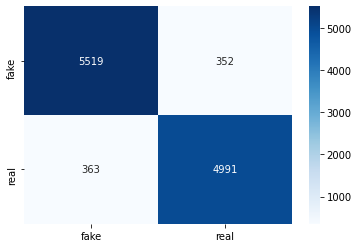

In [ ]:
print('accuracy: {:.2f}%'.format(accuracy_score(y_test,nb_tf_pred)*100))
cm = confusion_matrix(y_test,nb_tf_pred)
sns.heatmap(cm, cmap = 'Blues', annot= True, fmt = 'd', xticklabels = ['fake','real'], yticklabels = ['fake','real'])
plt.show()

In [ ]:
scores = cross_val_score(nb_pipeline_tf, X= df.text, y= df.target, cv=5) 
print(scores)
print(scores.mean()*100)

[0.91158129 0.89053452 0.84977728 0.9094554  0.92849983]
89.79696649271463


# END